In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
import math
#from skimage import io
import re
import matplotlib.mlab as mlab


# # Import Feature List- this is a Python file- feature_list.py! Must be in same directory as this .ipynb file. 
# from feature_list import feature_labels

In [2]:
df_merged = pd.read_csv('bihar_features_gee.csv')


df_merged['Percentage Electrified_x'] = df_merged['eH']/df_merged['HH']*100
df_merged.head()


df_merged = df_merged.replace(-9, np.nan)
# for some reason the Census 2011 ID column was reading in as a float w/ a ".0" at the tail of
# each village so the next line is to drop the ".0"
#df['Census 2011 ID'] = df['Census 2011 ID'].astype(str).str[:-2]
#df['Percentage Electrified'] = (df['Number of Electrified Households']/df['Number of Households'])*100
#df['Census 2011 ID'] = df['Census 2011 ID'].str.split('.')[0]
#df['NL per Household'] = (df['TNL']/df['Number of Households'])*100
df_merged = df_merged.dropna(axis=0, how='any') 
#df_merged[~df_merged.index.duplicated(keep=False)]
df_merged = df_merged.copy()
df_merged.head()


,CEN_2011,NAME,eH,HH,01VIIRS_10th,02VIIRS_10th,03VIIRS_10th,04VIIRS_10th,05VIIRS_10th,06VIIRS_10th,...,B1_STD_DEV,B10_STD_DEV,B11_STD_DEV,B2_STD_DEV,B3_STD_DEV,B4_STD_DEV,B5_STD_DEV,B6_STD_DEV,B7_STD_DEV,Percentage Electrified_x
2,215991,Tharhi,214.0,339.0,0.043099,0.077040,0.170996,0.179324,0.291569,0.161928,...,0.023320,0.001737,0.001726,0.027221,0.034742,0.043921,0.086157,0.054006,0.043298,63.126844
3,215992,Pipra,59.0,107.0,0.419949,0.381883,0.491086,0.876705,0.542789,0.226300,...,0.012286,0.001196,0.001456,0.013462,0.018037,0.019069,0.087061,0.042743,0.023066,55.140187
4,215993,Kotaraha,64.0,128.0,0.204294,0.180164,0.262577,0.376620,0.400297,0.227038,...,0.012365,0.001090,0.001329,0.012730,0.016276,0.017785,0.079940,0.036686,0.019230,50.000000
5,215994,Rampurwa,118.0,726.0,0.227341,0.208226,0.287490,0.129210,0.462042,0.244227,...,0.012508,0.001505,0.001741,0.014410,0.019388,0.022390,0.075418,0.038113,0.028459,16.253444
6,215995,Lachhmipur,449.0,615.0,0.184173,0.188419,0.242215,0.190012,0.365727,0.189305,...,0.008256,0.000851,0.001157,0.008430,0.013690,0.013010,0.073827,0.033603,0.016145,73.008130


In [3]:
# electrified ()
print (df_merged[df_merged.CEN_2011 == 216538].iloc[0].to_string())

CEN_2011                        216538
NAME                         Basantpur
eH                                  11
HH                                 382
01VIIRS_10th                  0.634759
02VIIRS_10th                  0.590297
03VIIRS_10th                  0.655351
04VIIRS_10th                  0.446541
05VIIRS_10th                  0.619907
06VIIRS_10th                  0.486043
07VIIRS_10th                  0.604656
08VIIRS_10th                  0.240834
09VIIRS_10th                  0.682862
10VIIRS_10th                   1.20263
11VIIRS_10th                   1.43943
12VIIRS_10th                  0.921705
01VIIRS_25th                  0.698672
02VIIRS_25th                   0.62524
03VIIRS_25th                  0.730146
04VIIRS_25th                  0.661253
05VIIRS_25th                   0.63873
06VIIRS_25th                  0.514456
07VIIRS_25th                  0.614426
08VIIRS_25th                  0.490604
09VIIRS_25th                  0.708473
10VIIRS_25th             

In [4]:
def get_dist(mu, sigma): 
    return [x for x in np.random.normal(mu, sigma, 10000)] # if x >= min_ and x <=max_


In [5]:
def make_hist(s, mu, sigma): 
    count, bins, ignored = plt.hist(s, 30, normed=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
    plt.show()
    
make_hist(s, mu= 1.64411, sigma = 0.59296)

NameError: name 's' is not defined

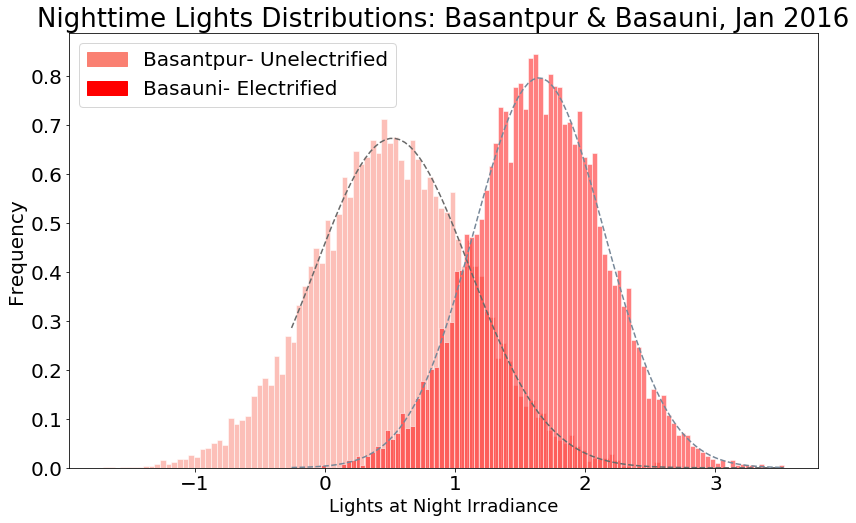

In [17]:
#02 viirs 75th

### log-transformed distribution of radiance values

# df_lt = df_merged[df_merged['Percentage Electrified_x'] <= 10 ]
# df_gt = df_merged[df_merged['Percentage Electrified_x'] > 10 ]
# df_lt.head()

mu = 0.518377
sigma = 0.59296
mu2 = 1.64411
sigma2 = 0.501138

s = get_dist(mu, sigma)
s2 = get_dist(mu2, sigma2)

# feature = '02VIIRS_90th'
# x = np.log(df_lt[feature])
# x2 = np.log(df_gt[feature])
# x = np.log(df_lt['06NDVI_MED'])
# x2 = np.log(df_gt['06NDVI_MED'])
# x = df_lt[feature]
# x2 = df_gt[feature]
num_bins = 100
plt.figure(figsize=(13,8))
n, bins, patches = plt.hist(s, num_bins, normed=1, facecolor='salmon', alpha=0.5, edgecolor=(1,1,1))
n, bins, patches = plt.hist(s2, num_bins, normed=1, facecolor='r', alpha=0.5, edgecolor=(1,1,1))
### mean and standard deviation calc's


# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, color='dimgrey', linestyle='dashed')
y2 = mlab.normpdf(bins, mu2, sigma2)
plt.plot(bins, y2, color='lightslategrey', linestyle='dashed')
plt.xlabel('Lights at Night Irradiance', fontsize=18)
plt.ylabel('Frequency', fontsize=20)
plt.title('Nighttime Lights Distributions: Basantpur & Basauni, Jan 2016', fontsize=26)# - Unelectrified $\mu={:0.2}$, $\sigma={:0.2}$; Electrified $\mu={:0.2}$, $\sigma={:0.2}$'.format(mu, sigma, mu2, sigma2))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='salmon', label='Basantpur- Unelectrified')
green_patch = mpatches.Patch(color='r', label='Basauni- Electrified')
plt.legend(handles=[red_patch, green_patch], prop={'size': 20})

# tweak spacing to prevent clipping of ylabel and set axis ranges to include all values
plt.subplots_adjust(left=0.1)
#pylab.ylim([0,y.max()])
# pylab.xlim([x.min(),x.max()])
#plt.savefig('min.png')
plt.savefig('lan_bb.png')

plt.show()


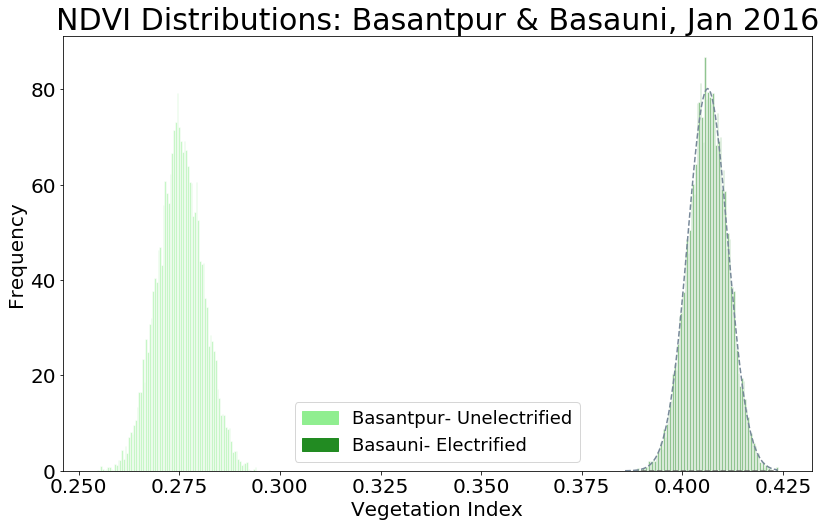

In [18]:
#02 viirs 75th

### log-transformed distribution of radiance values

# df_lt = df_merged[df_merged['Percentage Electrified_x'] <= 10 ]
# df_gt = df_merged[df_merged['Percentage Electrified_x'] > 10 ]
# df_lt.head()

# Basauni
mu = 0.27515
sigma = 0.00570833

# Basantpur
mu2 = 0.4063
sigma2 = 0.004975

# # Basauni (feb)
# mu = 0.3027 
# sigma = 0.0128699

# # Basantpur (feb)
# mu2 = 0.5926
# sigma2 = 0.039375

s = get_dist(mu, sigma)
s2 = get_dist(mu2, sigma2)

# feature = '02VIIRS_90th'
# x = np.log(df_lt[feature])
# x2 = np.log(df_gt[feature])
# x = np.log(df_lt['06NDVI_MED'])
# x2 = np.log(df_gt['06NDVI_MED'])
# x = df_lt[feature]
# x2 = df_gt[feature]
num_bins = 100
plt.figure(figsize=(13,8))
n, bins, patches = plt.hist(s, num_bins, normed=1, facecolor='lightgreen', alpha=0.5, edgecolor=(1,1,1))
n, bins, patches = plt.hist(s2, num_bins, normed=1, facecolor='forestgreen', alpha=0.5, edgecolor=(1,1,1))
### mean and standard deviation calc's


# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, color='dimgrey', linestyle='dashed')
y2 = mlab.normpdf(bins, mu2, sigma2)
plt.plot(bins, y2, color='lightslategrey', linestyle='dashed')
plt.xlabel('Vegetation Index', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('NDVI Distributions: Basantpur & Basauni, Jan 2016', fontsize=30)# - Unelectrified $\mu={:0.2}$, $\sigma={:0.2}$; Electrified $\mu={:0.2}$, $\sigma={:0.2}$'.format(mu, sigma, mu2, sigma2))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='lightgreen', label='Basantpur- Unelectrified')
green_patch = mpatches.Patch(color='forestgreen', label='Basauni- Electrified')
plt.legend(handles=[red_patch, green_patch], prop={'size': 18})

# tweak spacing to prevent clipping of ylabel and set axis ranges to include all values
plt.subplots_adjust(left=0.1)
#pylab.ylim([0,y.max()])
# pylab.xlim([x.min(),x.max()])
plt.savefig('ndvi_bb.png')
plt.show()


In [10]:
# unelectrified 
df_merged[df_merged.CEN_2011 == 216538].iloc[0]

CEN_2011                        216538
NAME                         Basantpur
eH                                  11
HH                                 382
01VIIRS_10th                  0.634759
02VIIRS_10th                  0.590297
03VIIRS_10th                  0.655351
04VIIRS_10th                  0.446541
05VIIRS_10th                  0.619907
06VIIRS_10th                  0.486043
07VIIRS_10th                  0.604656
08VIIRS_10th                  0.240834
09VIIRS_10th                  0.682862
10VIIRS_10th                   1.20263
11VIIRS_10th                   1.43943
12VIIRS_10th                  0.921705
01VIIRS_25th                  0.698672
02VIIRS_25th                   0.62524
03VIIRS_25th                  0.730146
04VIIRS_25th                  0.661253
05VIIRS_25th                   0.63873
06VIIRS_25th                  0.514456
07VIIRS_25th                  0.614426
08VIIRS_25th                  0.490604
09VIIRS_25th                  0.708473
10VIIRS_25th             

In [9]:
def convert_fill(df):
    return df.stack().apply(pd.to_numeric, errors='ignore').fillna(-1).unstack()

convert_fill(df_merged)

,CEN_2011,NAME,eH,HH,01VIIRS_10th,02VIIRS_10th,03VIIRS_10th,04VIIRS_10th,05VIIRS_10th,06VIIRS_10th,...,B1_STD_DEV,B10_STD_DEV,B11_STD_DEV,B2_STD_DEV,B3_STD_DEV,B4_STD_DEV,B5_STD_DEV,B6_STD_DEV,B7_STD_DEV,Percentage Electrified_x
2,215991,Tharhi,214,339,0.0430989,0.0770397,0.170996,0.179324,0.291569,0.161928,...,0.0233201,0.00173744,0.00172573,0.0272214,0.0347415,0.0439213,0.0861571,0.0540055,0.0432975,63.1268
3,215992,Pipra,59,107,0.419949,0.381883,0.491086,0.876705,0.542789,0.2263,...,0.0122864,0.0011957,0.00145618,0.0134624,0.018037,0.0190686,0.0870611,0.0427434,0.0230658,55.1402
4,215993,Kotaraha,64,128,0.204294,0.180164,0.262577,0.37662,0.400297,0.227038,...,0.0123649,0.00109036,0.00132881,0.0127297,0.0162759,0.0177853,0.0799403,0.0366857,0.0192296,50
5,215994,Rampurwa,118,726,0.227341,0.208226,0.28749,0.12921,0.462042,0.244227,...,0.0125083,0.00150466,0.0017405,0.0144105,0.0193878,0.0223897,0.075418,0.0381127,0.0284593,16.2534
6,215995,Lachhmipur,449,615,0.184173,0.188419,0.242215,0.190012,0.365727,0.189305,...,0.00825629,0.000851,0.00115653,0.0084302,0.0136899,0.0130102,0.0738275,0.033603,0.0161446,73.0081
7,215996,Daruabari,139,205,0.126648,0.115672,0.166718,0.21346,0.282693,0.166244,...,0.0133612,0.000729,0.00106748,0.0122573,0.0192984,0.0132547,0.140633,0.0639387,0.0280253,67.8049
8,215997,Santpur,388,394,0.137379,0.134091,0.153005,0.206683,0.29134,0.226605,...,0.0110711,0.000615,0.000845,0.0111668,0.0186601,0.0161862,0.113522,0.0561761,0.0250207,98.4772
9,215998,Soharia,207,269,0.0891122,0.0463192,0.123335,0.134465,0.261156,0.18332,...,0.00971716,0.000701,0.00108322,0.00988066,0.0167103,0.0132512,0.0914217,0.0436998,0.0219876,76.9517
10,215999,Parsauni,5,37,0.139749,0.208715,0.225367,0.187511,0.349062,0.216703,...,0.0106213,0.00115149,0.00145621,0.010451,0.0149781,0.0144468,0.0772286,0.0396902,0.0203126,13.5135
11,216000,Balgangwa,202,443,-0.0426673,-0.0403505,0.0557397,0.0731347,0.166361,0.0769127,...,0.0170138,0.00128092,0.00146377,0.0188129,0.0234896,0.027046,0.0804632,0.0467034,0.0314495,45.5982


In [11]:
df_merged.head()

,CEN_2011,NAME,eH,HH,01VIIRS_10th,02VIIRS_10th,03VIIRS_10th,04VIIRS_10th,05VIIRS_10th,06VIIRS_10th,...,B1_STD_DEV,B10_STD_DEV,B11_STD_DEV,B2_STD_DEV,B3_STD_DEV,B4_STD_DEV,B5_STD_DEV,B6_STD_DEV,B7_STD_DEV,Percentage Electrified_x
2,215991,Tharhi,214.0,339.0,0.043099,0.077040,0.170996,0.179324,0.291569,0.161928,...,0.023320,0.001737,0.001726,0.027221,0.034742,0.043921,0.086157,0.054006,0.043298,63.126844
3,215992,Pipra,59.0,107.0,0.419949,0.381883,0.491086,0.876705,0.542789,0.226300,...,0.012286,0.001196,0.001456,0.013462,0.018037,0.019069,0.087061,0.042743,0.023066,55.140187
4,215993,Kotaraha,64.0,128.0,0.204294,0.180164,0.262577,0.376620,0.400297,0.227038,...,0.012365,0.001090,0.001329,0.012730,0.016276,0.017785,0.079940,0.036686,0.019230,50.000000
5,215994,Rampurwa,118.0,726.0,0.227341,0.208226,0.287490,0.129210,0.462042,0.244227,...,0.012508,0.001505,0.001741,0.014410,0.019388,0.022390,0.075418,0.038113,0.028459,16.253444
6,215995,Lachhmipur,449.0,615.0,0.184173,0.188419,0.242215,0.190012,0.365727,0.189305,...,0.008256,0.000851,0.001157,0.008430,0.013690,0.013010,0.073827,0.033603,0.016145,73.008130


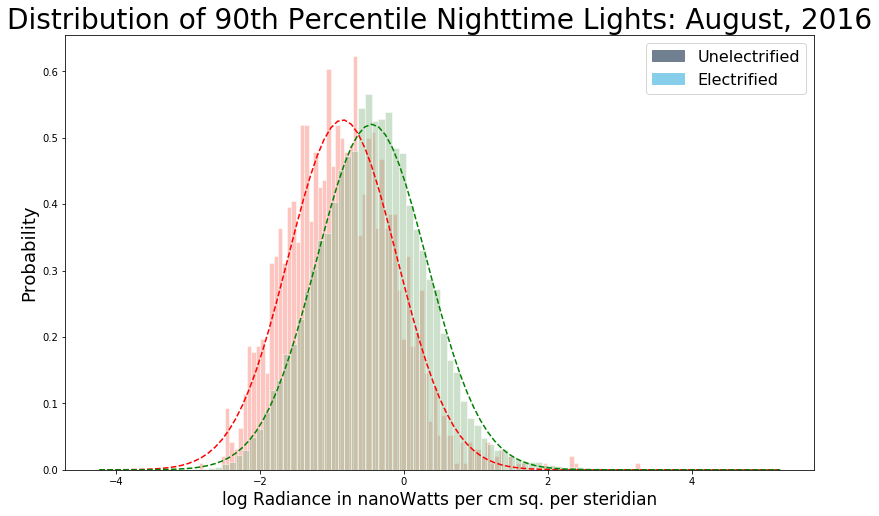

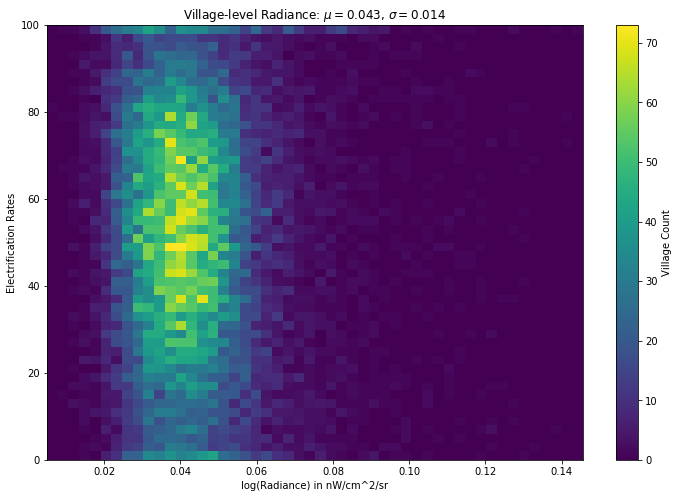

In [6]:
# a 2D histogram version of above data

from matplotlib.colors import LogNorm
import pylab

#x = np.log(df_merged['POP_DENS_MIN'])
#x = np.log(df_merged['POP_DENS_STD_DEV']).astype(float)
x = df_merged['B6_STD_DEV']

y = df_merged['Percentage Electrified_x']

mu = np.mean(x)
sigma = np.std(x)

plt.figure(figsize=(12,8))
#plt.hist2d(x, y, bins=52, norm=LogNorm())
plt.hist2d(x, y, bins=(50, 50))
plt.colorbar().set_label('Village Count')
pylab.ylim([y.min(),y.max()])
#pylab.xlim([x.min(),x.max()])
plt.xlabel('log(Radiance) in nW/cm^2/sr')
plt.ylabel('Electrification Rates')
plt.title('Village-level Radiance: $\mu={:0.2}$, $\sigma={:0.2}$'.format(mu, sigma))
plt.show()

C:\Users\shami\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NameError: name 'pylab' is not defined

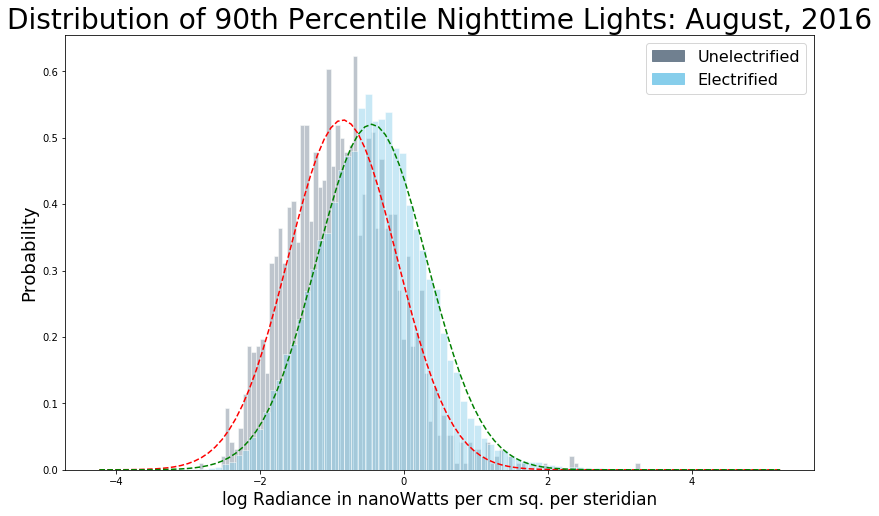

In [12]:
#08 viirs 90th

### log-transformed distribution of radiance values

df_lt = df_merged[df_merged['Percentage Electrified_x'] <= 10 ]
df_gt = df_merged[df_merged['Percentage Electrified_x'] > 10 ]
# df_lt.head()

feature = '08VIIRS_90th'
x = np.log(df_lt[feature])
x2 = np.log(df_gt[feature])
# x = np.log(df_lt['06NDVI_MED'])
# x2 = np.log(df_gt['06NDVI_MED'])
# x = df_lt[feature]
# x2 = df_gt[feature]
num_bins = 100
plt.figure(figsize=(13,8))
n, bins, patches = plt.hist(x.dropna(), num_bins, normed=1, facecolor='slategrey', alpha=0.45, edgecolor=(1,1,1))
n, bins, patches = plt.hist(x2.dropna(), num_bins, normed=1, facecolor='skyblue', alpha=0.45, edgecolor=(1,1,1))
### mean and standard deviation calc's
mu = np.mean(x)
sigma = np.std(x)
mu2 = np.mean(x2)
sigma2 = np.std(x2)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
y2 = mlab.normpdf(bins, mu2, sigma2)
plt.plot(bins, y2, 'g--')
plt.xlabel('log Radiance in nanoWatts per cm sq. per steridian', fontsize=17)
plt.ylabel('Probability', fontsize=18)
plt.title('Distribution of 90th Percentile Nighttime Lights: August, 2016', fontsize=28)# - Unelectrified $\mu={:0.2}$, $\sigma={:0.2}$; Electrified $\mu={:0.2}$, $\sigma={:0.2}$'.format(mu, sigma, mu2, sigma2))

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='slategrey', label='Unelectrified')
green_patch = mpatches.Patch(color='skyblue', label='Electrified')
plt.legend(handles=[red_patch, green_patch], prop={'size': 16})

# tweak spacing to prevent clipping of ylabel and set axis ranges to include all values
plt.subplots_adjust(left=0.1)
#pylab.ylim([0,y.max()])
pylab.xlim([x.min(),x.max()])
plt.show()

C:\Users\shami\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\shami\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NameError: name 'pylab' is not defined

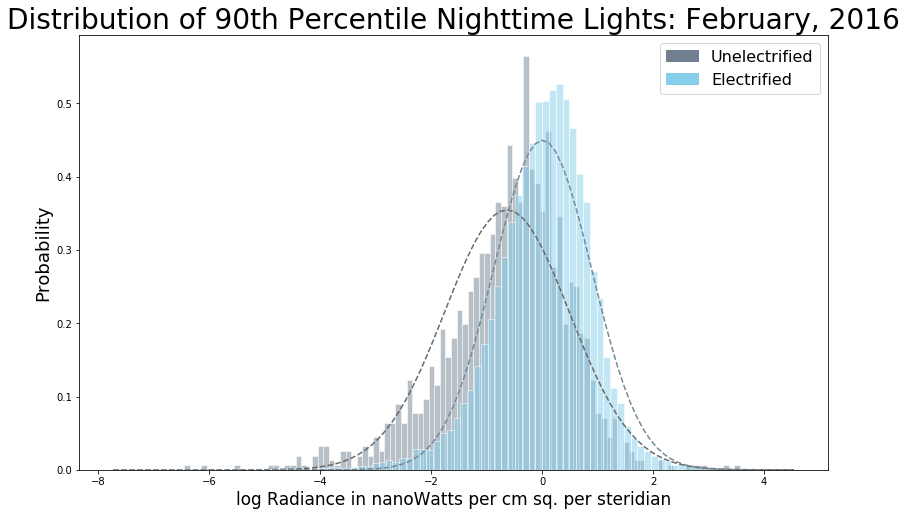

In [20]:
#02 viirs 75th

### log-transformed distribution of radiance values

df_lt = df_merged[df_merged['Percentage Electrified_x'] <= 10 ]
df_gt = df_merged[df_merged['Percentage Electrified_x'] > 10 ]
# df_lt.head()

feature = '02VIIRS_90th'
x = np.log(df_lt[feature])
x2 = np.log(df_gt[feature])
# x = np.log(df_lt['06NDVI_MED'])
# x2 = np.log(df_gt['06NDVI_MED'])
# x = df_lt[feature]
# x2 = df_gt[feature]
num_bins = 100
plt.figure(figsize=(13,8))
n, bins, patches = plt.hist(x.dropna(), num_bins, normed=1, facecolor='slategrey', alpha=0.5, edgecolor=(1,1,1))
n, bins, patches = plt.hist(x2.dropna(), num_bins, normed=1, facecolor='skyblue', alpha=0.5, edgecolor=(1,1,1))
### mean and standard deviation calc's
mu = np.mean(x)
sigma = np.std(x)
mu2 = np.mean(x2)
sigma2 = np.std(x2)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, color='dimgrey', linestyle='dashed')
y2 = mlab.normpdf(bins, mu2, sigma2)
plt.plot(bins, y2, color='lightslategrey', linestyle='dashed')
plt.xlabel('log Radiance in nanoWatts per cm sq. per steridian', fontsize=17)
plt.ylabel('Probability', fontsize=18)
plt.title('Distribution of 90th Percentile Nighttime Lights: February, 2016', fontsize=28)# - Unelectrified $\mu={:0.2}$, $\sigma={:0.2}$; Electrified $\mu={:0.2}$, $\sigma={:0.2}$'.format(mu, sigma, mu2, sigma2))

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='slategrey', label='Unelectrified')
green_patch = mpatches.Patch(color='skyblue', label='Electrified')
plt.legend(handles=[red_patch, green_patch], prop={'size': 16})

# tweak spacing to prevent clipping of ylabel and set axis ranges to include all values
plt.subplots_adjust(left=0.1)
#pylab.ylim([0,y.max()])
pylab.xlim([x.min(),x.max()])
plt.savefig('min.png')
plt.show()


NameError: name 'pylab' is not defined

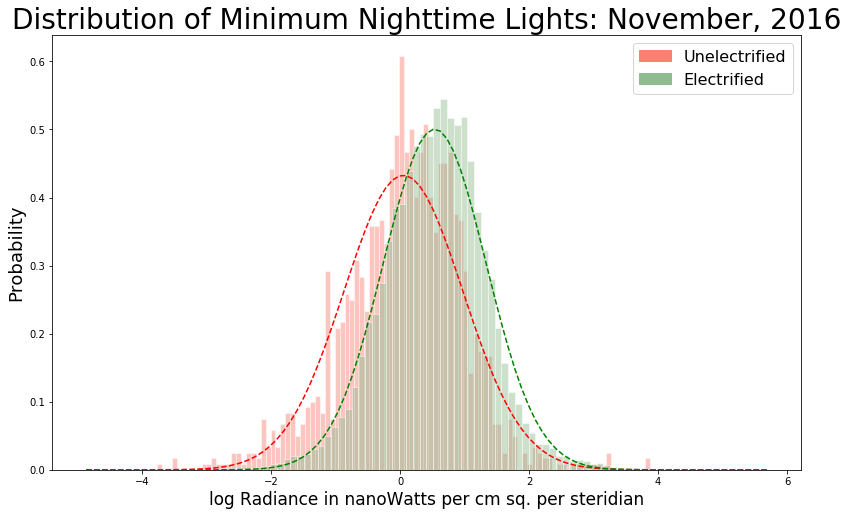

In [17]:
#07 viirs 75th

### log-transformed distribution of radiance values

df_lt = df_merged[df_merged['Percentage Electrified_x'] <= 10 ]
df_gt = df_merged[df_merged['Percentage Electrified_x'] > 10 ]
# df_lt.head()

feature = '11VIIRS_MIN'
x = np.log(df_lt[feature])
x2 = np.log(df_gt[feature])
# x = np.log(df_lt['06NDVI_MED'])
# x2 = np.log(df_gt['06NDVI_MED'])
# x = df_lt[feature]
# x2 = df_gt[feature]
num_bins = 100
plt.figure(figsize=(13,8))
n, bins, patches = plt.hist(x.dropna(), num_bins, normed=1, facecolor='salmon', alpha=0.45, edgecolor=(1,1,1))
n, bins, patches = plt.hist(x2.dropna(), num_bins, normed=1, facecolor='darkseagreen', alpha=0.45, edgecolor=(1,1,1))
### mean and standard deviation calc's
mu = np.mean(x)
sigma = np.std(x)
mu2 = np.mean(x2)
sigma2 = np.std(x2)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
y2 = mlab.normpdf(bins, mu2, sigma2)
plt.plot(bins, y2, 'g--')
plt.xlabel('log Radiance in nanoWatts per cm sq. per steridian', fontsize=17)
plt.ylabel('Probability', fontsize=18)
plt.title('Distribution of Minimum Nighttime Lights: November, 2016', fontsize=28)# - Unelectrified $\mu={:0.2}$, $\sigma={:0.2}$; Electrified $\mu={:0.2}$, $\sigma={:0.2}$'.format(mu, sigma, mu2, sigma2))

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='salmon', label='Unelectrified')
green_patch = mpatches.Patch(color='darkseagreen', label='Electrified')
plt.legend(handles=[red_patch, green_patch], prop={'size': 16})

# tweak spacing to prevent clipping of ylabel and set axis ranges to include all values
plt.subplots_adjust(left=0.1)
#pylab.ylim([0,y.max()])
pylab.xlim([x.min(),x.max()])
plt.show()

/Users/Brian/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/Users/Brian/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Brian/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Users/Brian/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


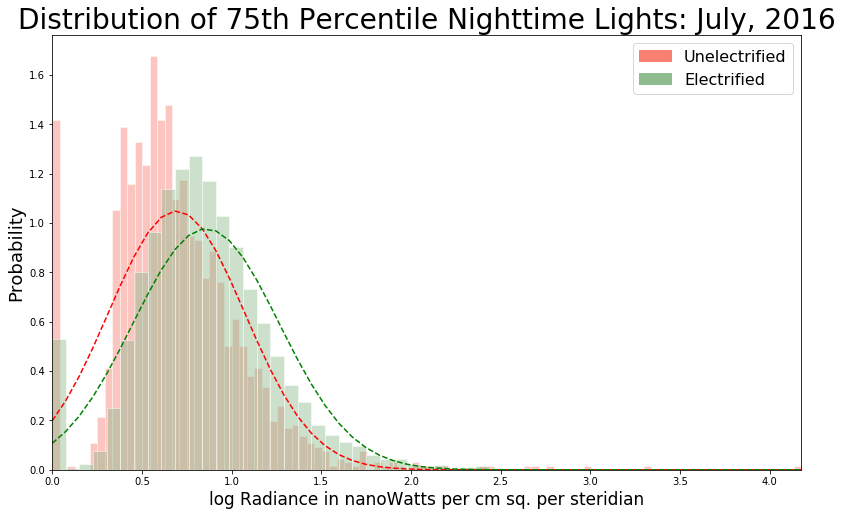

In [126]:
#07 viirs 75th

### log-transformed distribution of radiance values

df_lt = df_merged[df_merged['Percentage Electrified_x'] <= 10 ]
df_gt = df_merged[df_merged['Percentage Electrified_x'] > 10 ]
# df_lt.head()

feature = '07VIIRS_75th'
x = np.sqrt(df_lt[feature])
x2 = np.sqrt(df_gt[feature])
# x = np.log(df_lt[feature])
# x2 = np.log(df_gt[feature])
# x = df_lt[feature]
# x2 = df_gt[feature]
num_bins = 100
plt.figure(figsize=(13,8))
n, bins, patches = plt.hist(x.dropna(), num_bins, normed=1, facecolor='salmon', alpha=0.45, edgecolor=(1,1,1))
n, bins, patches = plt.hist(x2.dropna(), num_bins, normed=1, facecolor='darkseagreen', alpha=0.45, edgecolor=(1,1,1))
### mean and standard deviation calc's
mu = np.mean(x)
sigma = np.std(x)
mu2 = np.mean(x2)
sigma2 = np.std(x2)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
y2 = mlab.normpdf(bins, mu2, sigma2)
plt.plot(bins, y2, 'g--')
plt.xlabel('log Radiance in nanoWatts per cm sq. per steridian', fontsize=17)
plt.ylabel('Probability', fontsize=18)
plt.title('Distribution of 75th Percentile Nighttime Lights: July, 2016', fontsize=28)# - Unelectrified $\mu={:0.2}$, $\sigma={:0.2}$; Electrified $\mu={:0.2}$, $\sigma={:0.2}$'.format(mu, sigma, mu2, sigma2))

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='salmon', label='Unelectrified')
green_patch = mpatches.Patch(color='darkseagreen', label='Electrified')
plt.legend(handles=[red_patch, green_patch], prop={'size': 16})

# tweak spacing to prevent clipping of ylabel and set axis ranges to include all values
plt.subplots_adjust(left=0.1)
#pylab.ylim([0,y.max()])
pylab.xlim([x.min(),x.max()])
plt.show()

In [ ]:
#08 viirs 90th
#02 viirs 75th
#07 viirs 75th
#11 viirs min